In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## EXERCICI 1

Importamos el dataset :

In [3]:
Housing=pd.read_csv('housing data.csv',names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

## Análisis exploratorio preliminar del dataset:  

El dataset contiene datos acerca de las características económicas, sociales y ambientales de varias áreas situadas en los alrededores de Boston.Fue creado con la intención de valorar el impacto de estas características sobre el precio medio de la vivienda en propiedad.

In [ ]:
Descripción del dataset y de sus variables :
    
1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [4]:
Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
Housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
Housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
Housing.RAD.value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

El dataset está compuesto de 506 filas (las ciudades alrededor de Boston), y 14 columnas (las variables)

Las variables son todas numéricas contínuas de tipo float64 a la excepción de las siguientes :
- CHAS : es una variable discreta binaria (1,0), 1 si el área linda con el río Charles, 0 sino.  
- RAD : es una variable discreta categórica que representa la facilidad de acceso a las autopistas, siendo 1 el grado mínimo (menor facilidad de acceso) y 24 el grado máximo (mayor facilidad de acceso)

El dataset no presenta ningún valor Null o NaN

In [8]:
Housing.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


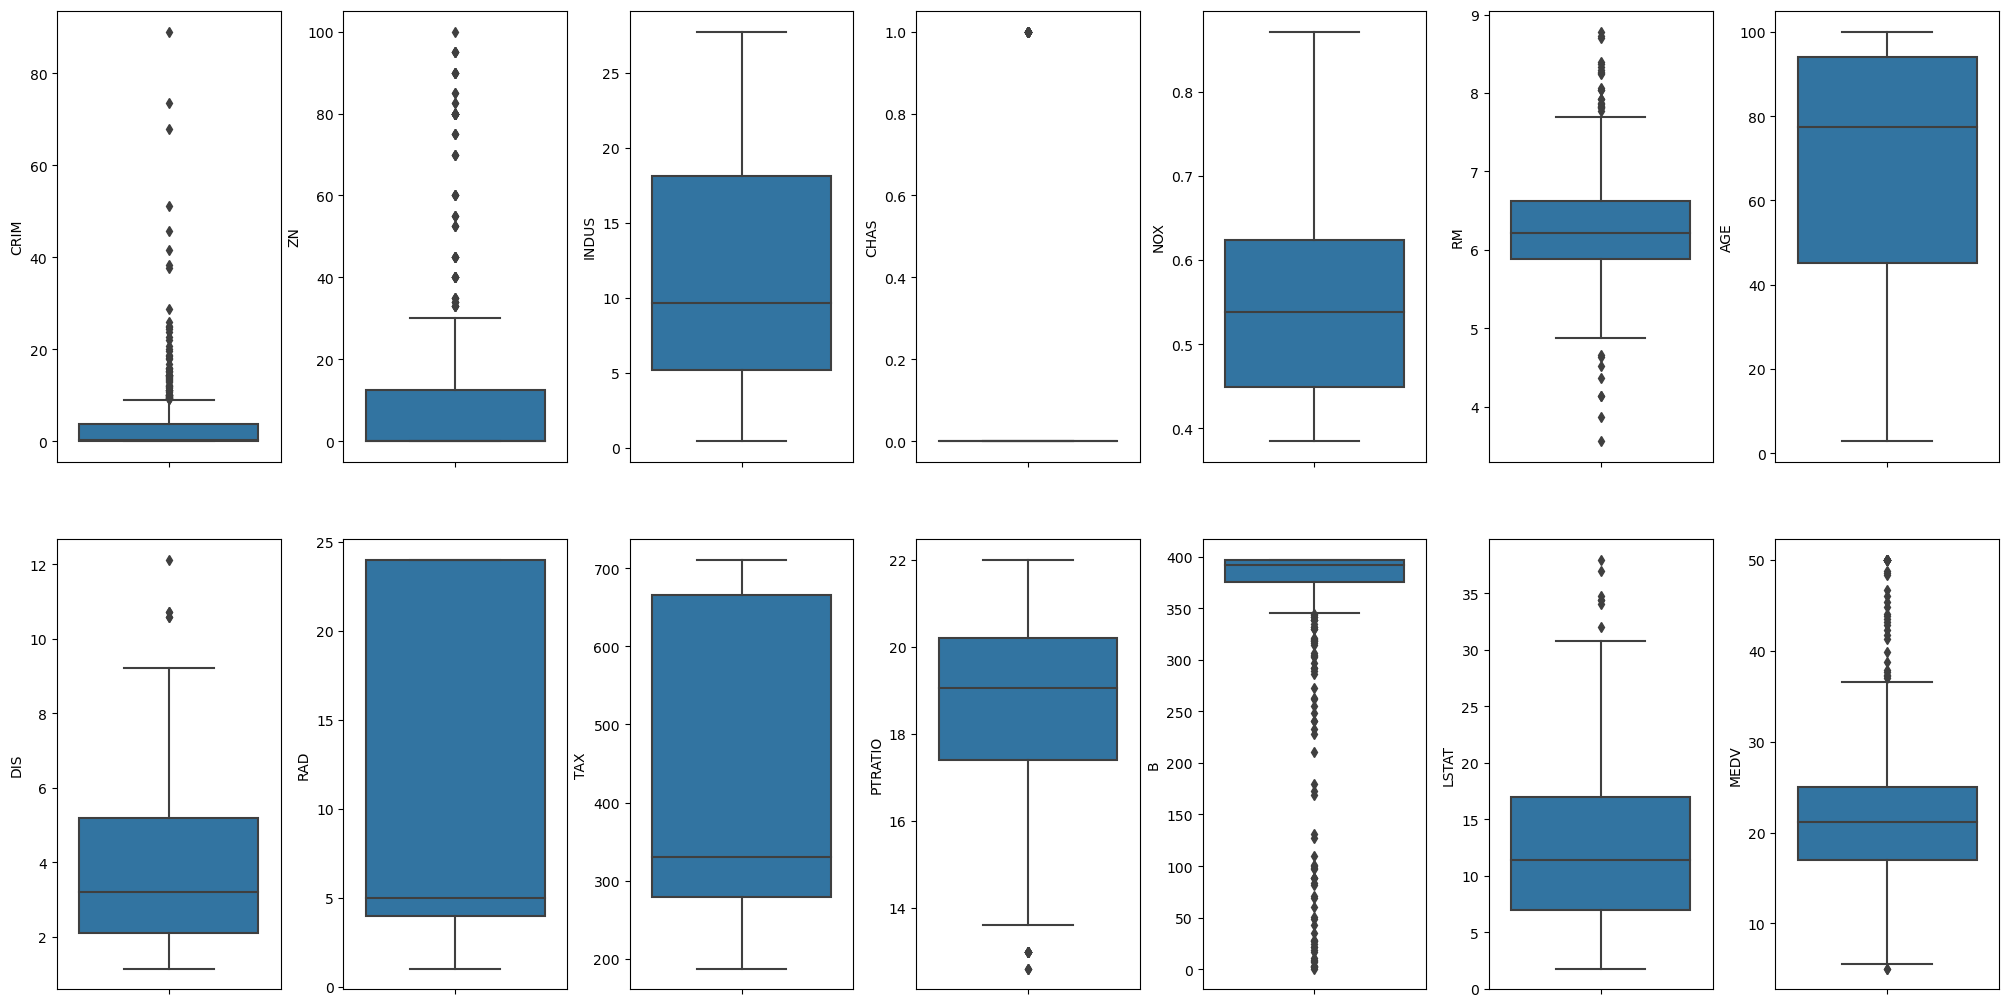

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Housing.items():
    sns.boxplot(y=k, data=Housing, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Del resumen estadístico y gráfico podemos destacar lo siguiente :

Las variables CRIM,ZN,B y MEDV tienen los valores muy concentrados alrededor de la media, y presentan una serie de outliers muy alejados de la media, los cuales debemos valorar si podrían ser errores, y de no poderse calificar como tal, valorar más adelante en que medida deben ser corregidos o no en la fase del pre-processing, por su posible influencia en los modelos predictivos. Como podemos ver más abajo, ninguno de estos valores puede ser calificado como error:

 - CRIM : la media del ratio de delincuencia es de 3,6 individuos por 100 en la población, y el 75% de las observaciones están por debajo de esta media, no obstante, no podemos descartar que ciertos barrios tengan un ratio de delincuencia muy alto hasta el máximo de 88,9 indiv individuos por 100 habitantes.  
 
 
 - ZN : la mayoría de las áreas no tienen ninguna zona reservada para parcela de más de 25.000 sq.ft (2.250 sqm), es coherente que algunas pocas puedan llegar a tener cerca o hasta incluso el 100% reservadas.  
 
 
 - B: los datos están muy concentrados alrededor de la media de 356, un dato que representa el peso de la población afro-americana en la población total, ciertos datos tienden a 0. No podemos descartar que en ciertas áreas la representación de la población afro-americana tienda a 0.  
 
 
 - MEDV : aunque el 75% de las viviendas de los alrededores de Boston tengan un precio inferior a 25.000USD, no podemos descartar que algunas pocas viviendas alcancen el precio de 50.000USD.
 

<AxesSubplot:>

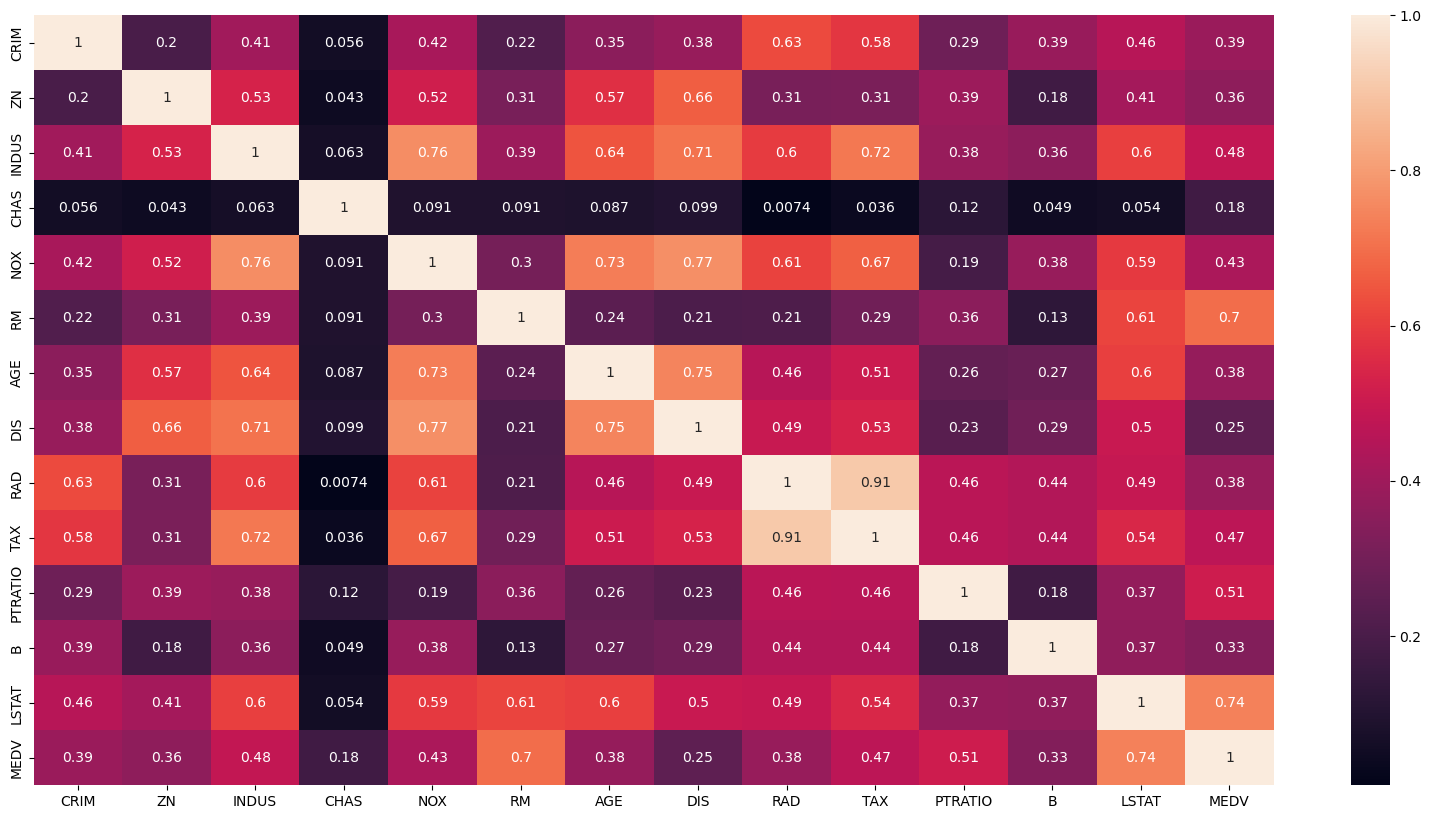

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(Housing.corr().abs(),  annot=True)

La matriz de correlación nos permite detectar que la variable MEDV parece tener una correlación significativa (entre 0,4 y 0,6) con las siguientes variables : INDUS,TAX, NOX, PTRATIO y muy significativa (más de 0,7) con aquellas : LSTAT Y RM



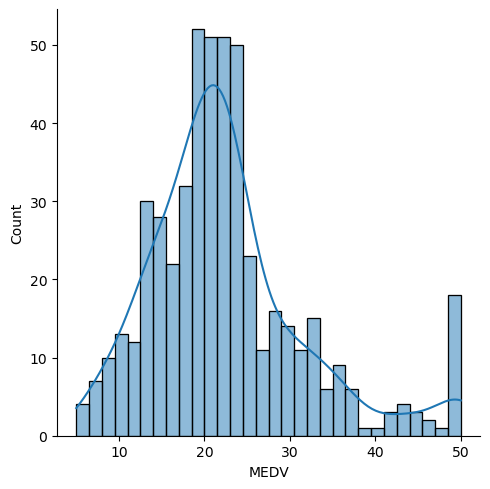

In [11]:

sns.displot(Housing['MEDV'], bins=30,kde=True)
plt.show()

Una gráfica de la distribución de la variable nos podría hacer pensar que MEDV es de tipo Gaussiana, a la excepción de los outliers detectados anteriormente. Vamos a comprobarlo con el test de Shapiro Wilk.

#### TEST DE SHAPIRO WILK 

H0 : la variable está normalmente distribuida  
H1 : la variable no está normalmente distribuida

In [12]:
from scipy.stats import shapiro

data=Housing['MEDV']
stat, p = shapiro(data)
print('p_value ',p)

p_value  4.939965499209636e-16


el p-value tiende a 0, debemos rechazar H0, **la variable MEDV, muy probablemente, no es Gaussiana**.

In [13]:
from scipy.stats import shapiro

data=Housing[(Housing['MEDV']<35)]['MEDV']
stat, p = shapiro(data)
print('p_value ',p)

p_value  0.0027715584728866816


Incluso después de sacar los outliers más distantes, p-value sigue siendo bajo.

## Creación de los subsets Train/Test 
Vamos a considerar que la variable y/output sobre la cual queremos realizar predicciones es MEDV, y el resto de variables que conforman e grupo X/input son las que hemos seleccionado anteriormente: INDUS,TAX, NOX, PTRAIO,LISTAT Y RM

Aplicamos la proporción 80 train/20 test.

In [14]:
X=Housing.reindex(
    columns=['INDUS','TAX', 'NOX', 'PTRATIO','LSTAT','RM'])

y = Housing['MEDV']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 6)
(102, 6)
(404,)
(102,)


In [16]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
INDUS,404.0,11.077500,6.848412,0.460,5.19000,9.125,18.1000,27.740
TAX,404.0,403.257426,169.030480,187.000,277.00000,329.000,666.0000,711.000
NOX,404.0,0.553026,0.116895,0.385,0.44800,0.535,0.6240,0.871
PTRATIO,404.0,18.438614,2.169469,12.600,17.22500,19.000,20.2000,22.000
LSTAT,404.0,12.778540,7.216403,1.730,7.09250,11.465,17.1025,37.970
RM,404.0,6.268792,0.689229,3.561,5.87675,6.179,6.6265,8.780


In [17]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
INDUS,102.0,11.371569,6.936416,1.250,4.99500,9.900,18.10000,27.740
TAX,102.0,427.960784,165.919873,193.000,304.00000,384.000,666.00000,711.000
NOX,102.0,0.561305,0.112075,0.389,0.48400,0.541,0.62400,0.871
PTRATIO,102.0,18.522549,2.156267,13.000,17.40000,19.200,20.20000,21.200
LSTAT,102.0,12.156078,6.846249,1.920,6.73500,10.865,16.41750,29.970
RM,102.0,6.347382,0.753613,4.138,5.98475,6.326,6.61175,8.725


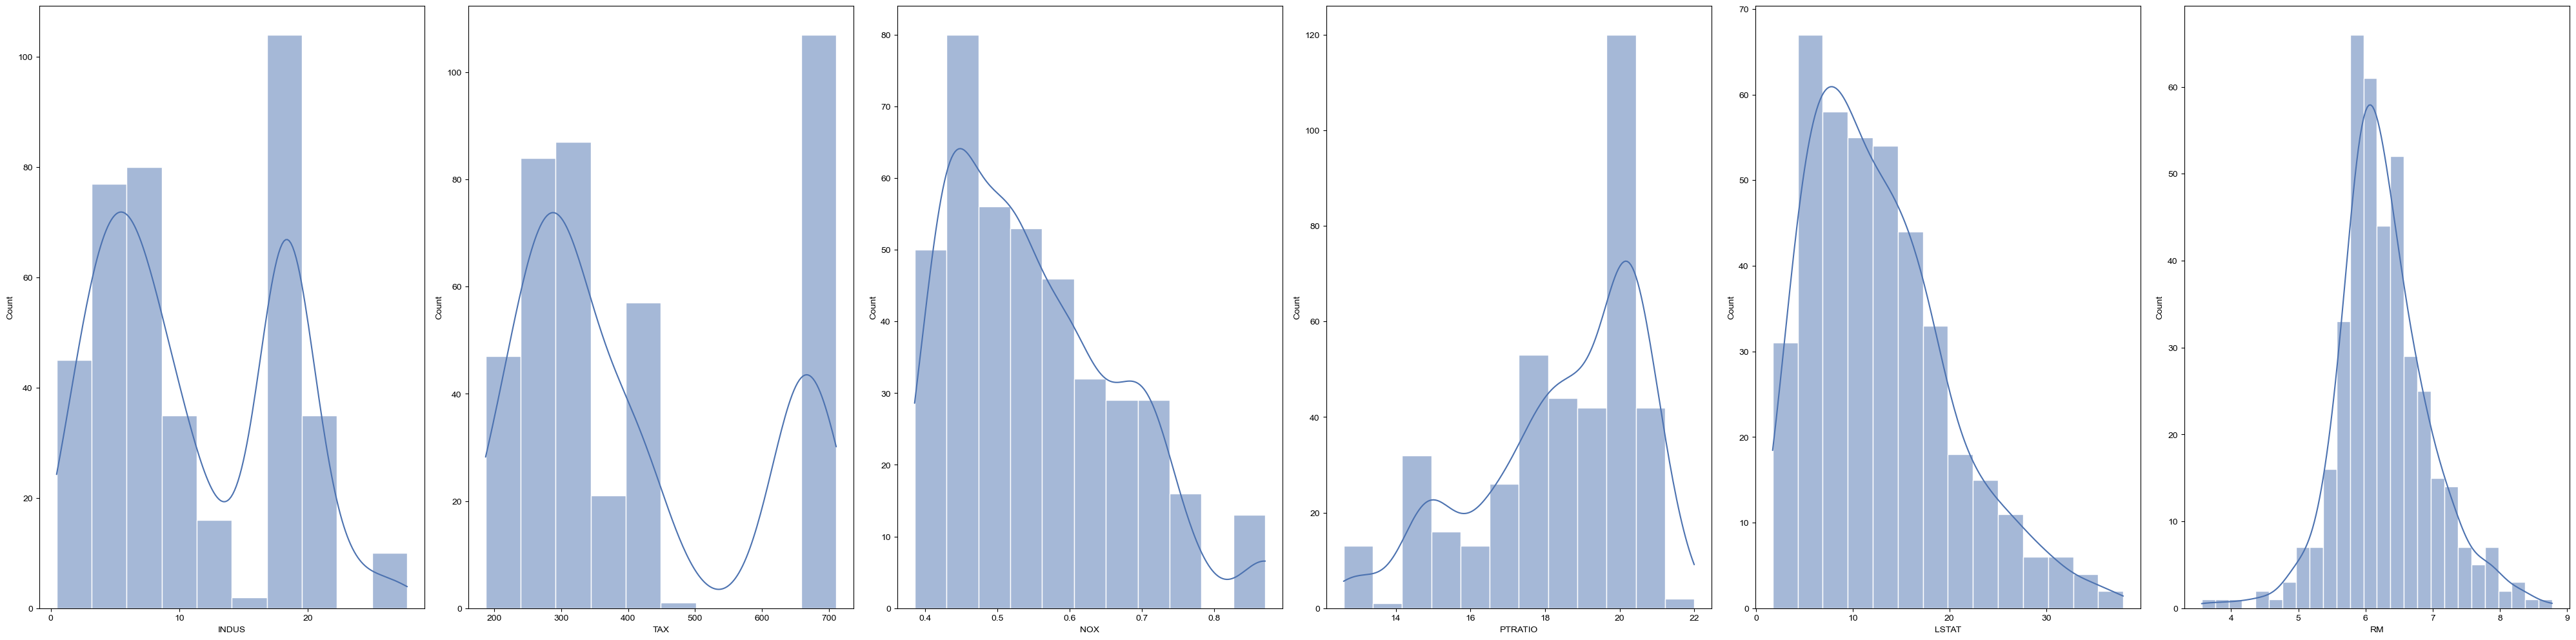

In [18]:
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(40, 10))
index = 0
axs = axs.flatten()
sns.set(font_scale=2)
for k,v in X_train.items():
    sns.histplot(x=k, data=X_train, ax=axs[index],kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


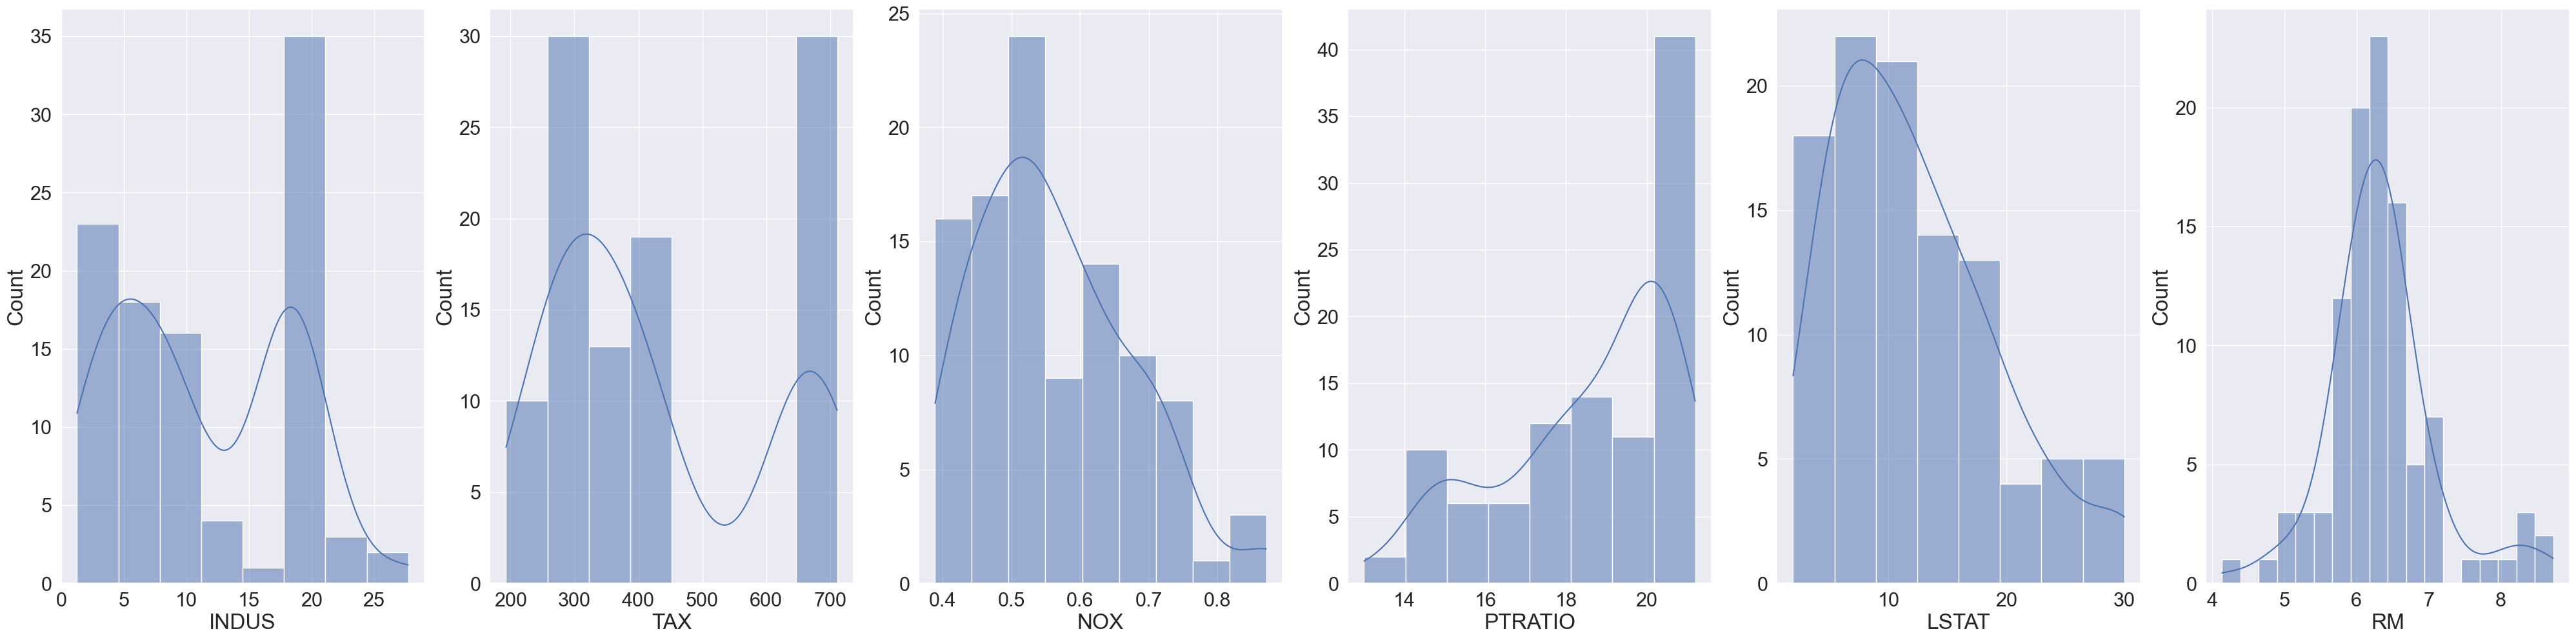

In [19]:
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(40, 10))
index = 0
axs = axs.flatten()
sns.set(font_scale=2)
for k,v in X_test.items():
    sns.histplot(x=k, data=X_test, ax=axs[index],kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

A la vista de los datos numéricos y de sus representaciones gráficas, no se aprecian diferencias sustanciales entre ambos subsets,X-train y X-test.

## Análisis exploratorio del subset X_train

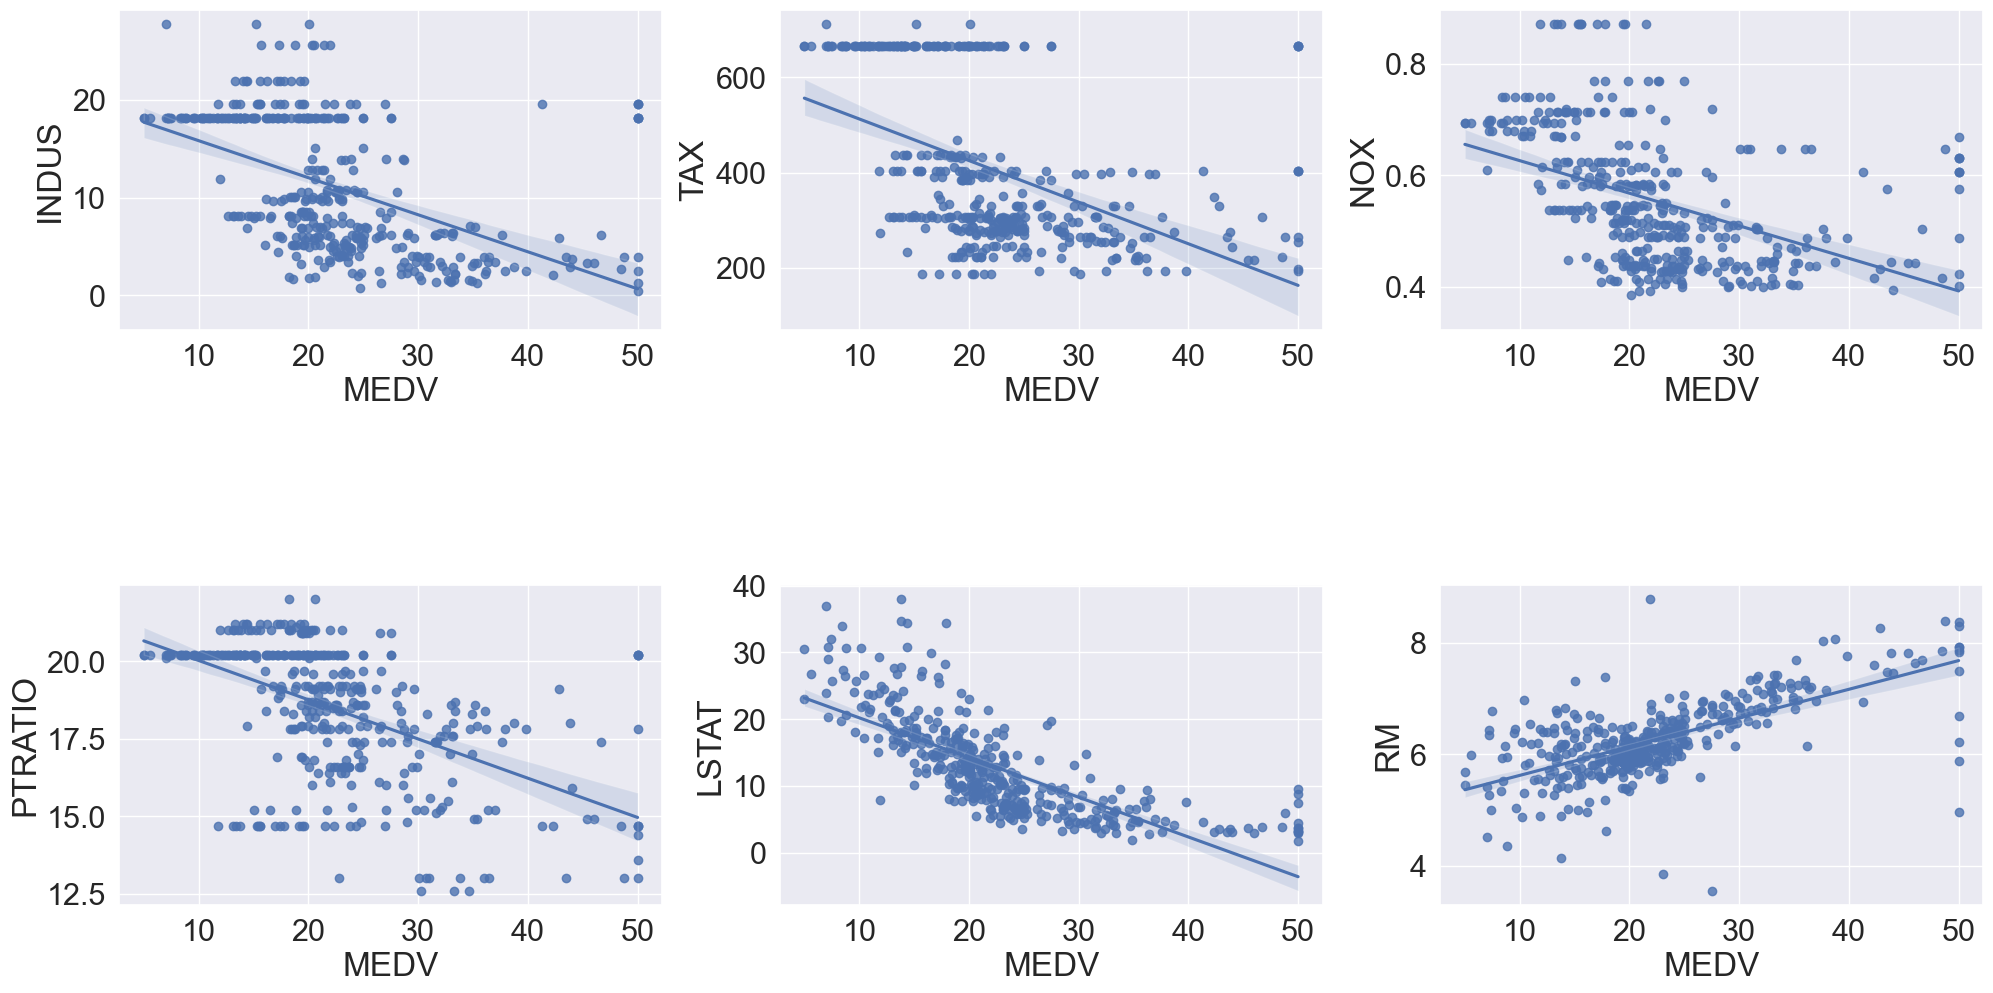

In [20]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
sns.set(font_scale=2)
for k,v in X_train.items():
    sns.regplot(y=v, x=y_train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Estas gráficas nos indican que parece existir correlación entre MEDV y las 6 variables escogidas.

#### TEST DE CORRELACION DE SPEARMANR  

H0 : las variables no tienen correlación  
H1 : las variables tienen correlación ¶

In [21]:
from scipy.stats import spearmanr
list1=['INDUS','TAX', 'NOX', 'PTRATIO','LSTAT','RM']
for i in list1:
    data1 = X_train[i]
    data2 = y_train
    stat, p = spearmanr(data1, data2)
    print('p_value '+str(i),p)

p_value INDUS 2.7785224323321913e-41
p_value TAX 2.609449653961658e-34
p_value NOX 7.572409477377885e-38
p_value PTRATIO 1.981457080325569e-37
p_value LSTAT 2.63188764405349e-115
p_value RM 6.637475794358194e-48


En los 6 casos, el p-value tiende a 0, debemos rechazar H0, de manera que **cada una de las 6 variables es muy probablemente correlacionada con MEDV**.

#### TEST DE SHAPIRO WILK 

H0 : la variable está normalmente distribuida  
H1 : la variable no está normalmente distribuida

In [22]:
from scipy.stats import shapiro

for i in list1:
    data=X_train[i]
    stat, p = shapiro(data)
    print('p_value '+str(i),p)



p_value INDUS 1.2254715979779975e-15
p_value TAX 1.9660917918165148e-21
p_value NOX 8.018451354285805e-13
p_value PTRATIO 5.074261408326503e-15
p_value LSTAT 3.70320050666062e-12
p_value RM 1.0894429891550317e-07


En los 6 casos, el p-value tiende a 0, debemos rechazar H0, de manera que **ninguna de las 6 variables está normalmente distribuida**.


## EXERCICI 2 / EXERCICI 3

En un primer momento, y después de verificar que en un principio las 6 variables no están normalmente distribuidas, intentaremos transformarlas para que así sean con Power Transformer (Yeo-Johnson transform) .

### TRANSFORMAR A GAUSSIANA

In [23]:
>>> import numpy as np
>>> from sklearn.preprocessing import PowerTransformer
>>> pt = PowerTransformer()   
>>> data = X_train
>>> print(pt.fit(data))


PowerTransformer()


In [24]:
print(pt.transform(data))

[[-0.46215267 -1.25047942 -0.95212568 -0.46071651 -1.05227002 -0.12373772]
 [-0.80859173 -0.62727967 -0.88747683  0.51758763 -0.80440832 -0.15886668]
 [ 1.02015287  1.38352643  1.2516923   0.84737689  1.91842669 -1.46807898]
 ...
 [ 1.02015287  1.38352643  1.21166768  0.84737689  0.98654304  0.21886312]
 [-0.59375188 -0.40060289 -0.25766061 -0.68082191 -0.05935975 -0.24545648]
 [-0.64008527 -0.68039828 -0.3436144   0.21436611 -0.41790332 -0.59517426]]


In [25]:
X_Trans=pd.DataFrame(data=pt.transform(data),columns=['INDUS_TR','TAX_TR', 'NOX_TR', 'PTRATIO_TR','LSTAT_TR','RM_TR'])
X_Trans


,INDUS_TR,TAX_TR,NOX_TR,PTRATIO_TR,LSTAT_TR,RM_TR
0,-0.462153,-1.250479,-0.952126,-0.460717,-1.052270,-0.123738
1,-0.808592,-0.627280,-0.887477,0.517588,-0.804408,-0.158867
2,1.020153,1.383526,1.251692,0.847377,1.918427,-1.468079
3,0.420845,0.286695,-1.098519,-0.063849,0.158276,-0.031780
4,1.020153,1.383526,0.460179,0.847377,0.756522,-1.024966
...,...,...,...,...,...,...
399,-1.151703,-0.327893,-1.762626,-1.062807,-0.330948,-0.556378
400,0.152659,-0.419246,-1.438991,0.214366,-1.126426,-0.276356
401,1.020153,1.383526,1.211668,0.847377,0.986543,0.218863
402,-0.593752,-0.400603,-0.257661,-0.680822,-0.059360,-0.245456


In [26]:
round(X_Trans.describe(),3)

,INDUS_TR,TAX_TR,NOX_TR,PTRATIO_TR,LSTAT_TR,RM_TR
count,404.000,404.000,404.000,404.000,404.000,404.000
mean,0.000,-0.000,0.000,-0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001
min,-2.254,-2.030,-1.876,-1.961,-2.511,-4.330
25%,-0.796,-0.702,-0.952,-0.752,-0.753,-0.555
50%,-0.096,-0.207,0.025,0.100,0.030,-0.109
75%,1.020,1.384,0.767,0.847,0.750,0.536
max,1.888,1.501,2.010,2.280,2.364,3.422


Según podemos observar en el resumen estadístico podríamos pensar que la transformación nos devuelve unas distribuciones muy parecidas a la Gaussiana:
- Medias iguales a 0
- Desviacones estándares iguales a 1
- Medianas tienden a 0  

Los cuantiles 25% y 75% en cambio no están muy centrados alrededor de la media.

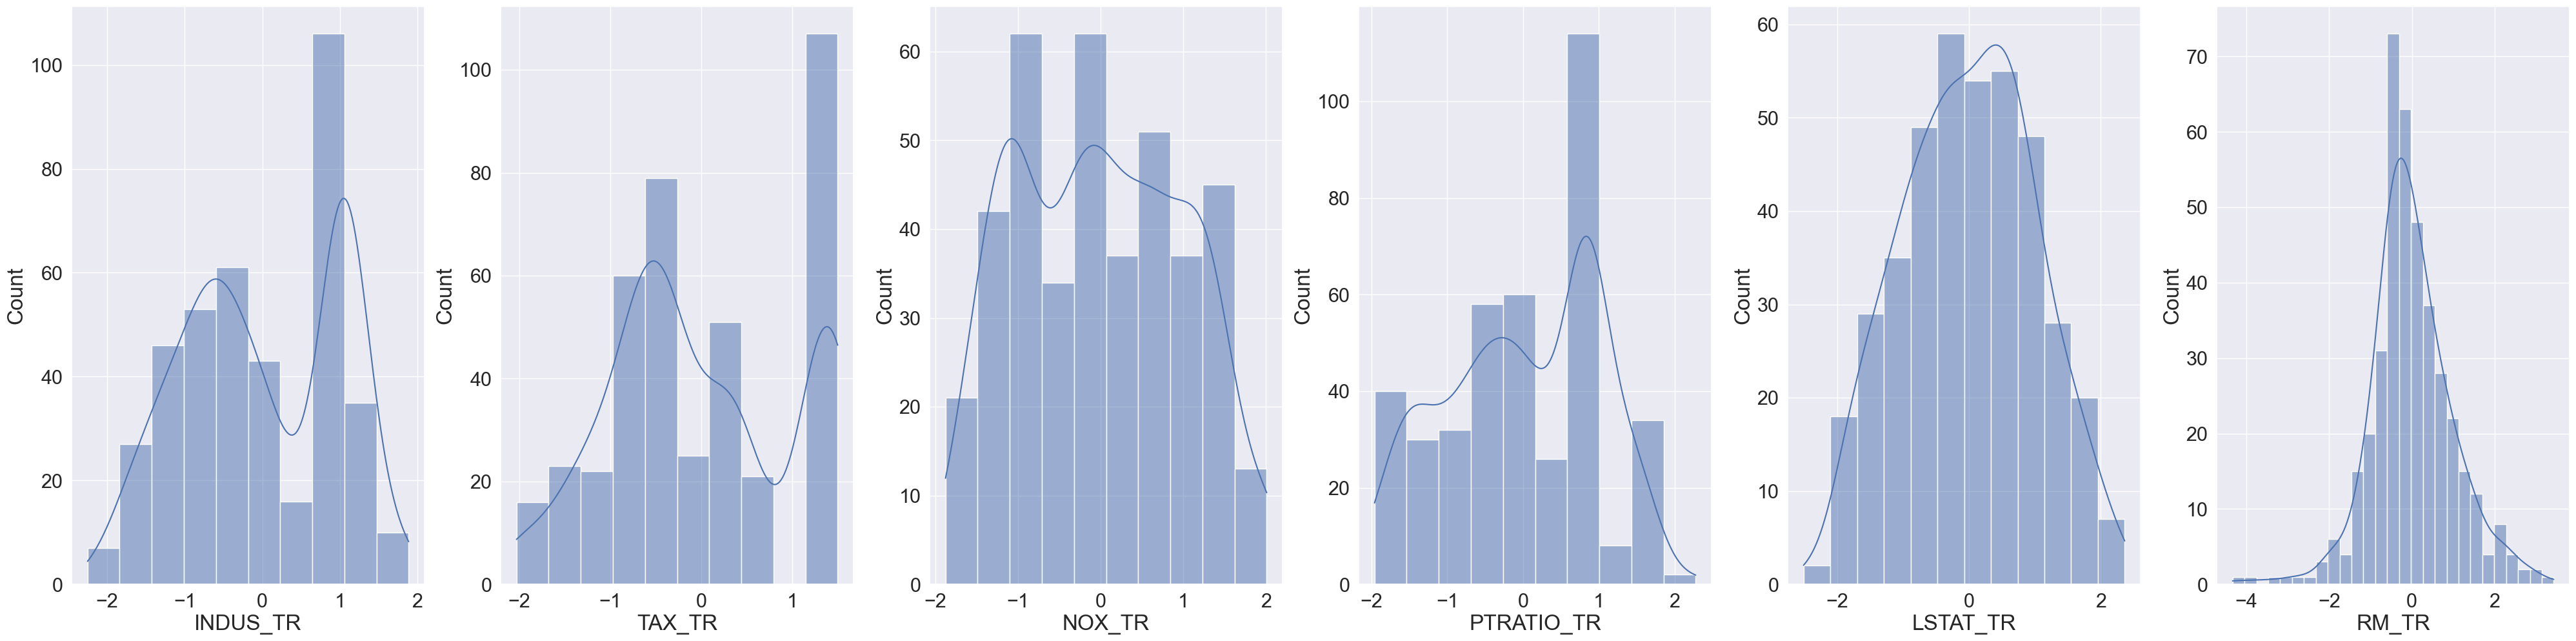

In [27]:
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(40, 10))
index = 0
axs = axs.flatten()
sns.set(font_scale=2)
for k,v in X_Trans.items():
    sns.histplot(x=k, data=X_Trans, ax=axs[index],kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

El resumen estadístico en cambio no parece ser compatible con distribuciones Gaussianas, a la excepción tal vez de las variables LSTAT y RM. Vamos a comprobarlo con el test de Shapiro Wilk.

#### TEST DE SHAPIRO WILK 

H0 : la variable está normalmente distribuida  
H1 : la variable no está normalmente distribuida

In [28]:
from scipy.stats import shapiro

list2=['INDUS_TR','TAX_TR', 'NOX_TR', 'PTRATIO_TR','LSTAT_TR','RM_TR']
for i in list2:
    data=X_Trans[i]
    stat, p = shapiro(data)
    print('p_value '+str(i),p)


p_value INDUS_TR 6.022797278265601e-13
p_value TAX_TR 2.1094245938207447e-14
p_value NOX_TR 1.1536623212293762e-08
p_value PTRATIO_TR 2.406411701849631e-11
p_value LSTAT_TR 0.013994615525007248
p_value RM_TR 1.57533023070755e-07


En todos los casos, el p-value es inferior al 5%, tenemos que rechazar H0, las distribuciones no son Gaussianas. 
La variable LSTAT, no osbtante, con un p_value del 1,4% se está acercando mucho y ha mejorado mucho con la transformación.

### NORMALIZAR CON MIN_MAX SCALER

Como alternativa vamos a probar de estandarizar los datos utilizando el MinMaxScaler.


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_train))


MinMaxScaler()


In [42]:
X_train_minmax=scaler.transform(X_train)

In [43]:
X_Scale=pd.DataFrame(data=X_train_minmax,columns=['INDUS_SC','TAX_SC', 'NOX_SC', 'PTRATIO_SC','LSTAT_SC','RM_SC'])
X_Scale.head()

,INDUS_SC,TAX_SC,NOX_SC,PTRATIO_SC,LSTAT_SC,RM_SC
0,0.236437,0.087786,0.129630,0.563830,0.112583,0.499713
1,0.171188,0.185115,0.139918,0.755319,0.141556,0.495114
2,0.646628,0.914122,0.648148,0.808511,0.802428,0.328799
3,0.453446,0.402672,0.106996,0.648936,0.292770,0.511784
4,0.646628,0.914122,0.409465,0.808511,0.425773,0.383982


In [44]:
X_Scale.describe()

,INDUS_SC,TAX_SC,NOX_SC,PTRATIO_SC,LSTAT_SC,RM_SC
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.389205,0.412705,0.345733,0.621129,0.304871,0.518834
std,0.251041,0.322577,0.240524,0.230795,0.199128,0.132061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173387,0.171756,0.129630,0.492021,0.147972,0.443715
50%,0.317632,0.270992,0.308642,0.680851,0.268626,0.501629
75%,0.646628,0.914122,0.491770,0.808511,0.424186,0.587373
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Según podemos observar, en todos los casos, los datos se sitúan entre el mínimo de 0 y máximo de 1.

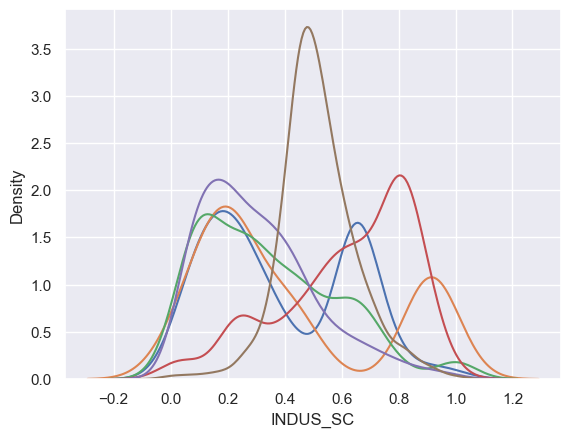

In [40]:
sns.set(font_scale=1)

sns.kdeplot(X_Scale['INDUS_SC'])
sns.kdeplot(X_Scale['TAX_SC'])
sns.kdeplot(X_Scale['NOX_SC'])
sns.kdeplot(X_Scale['PTRATIO_SC'])
sns.kdeplot(X_Scale['LSTAT_SC'])
sns.kdeplot(X_Scale['RM_SC'])
plt.show()

El proceso de estandarización nos permite ahora visualizar todos los datos en una misma gráfica al haber reducido las escalas al rango 0,1.